## Introducción a la ciencia de las redes: _Actividad entregable 4_

#### _Briones Andrade Joshua_


In [9]:
import numpy as np
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

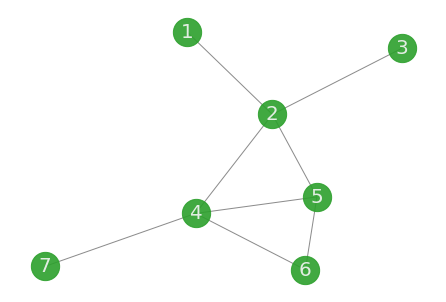

In [10]:
G = nx.Graph()

options = {"edge_color": "tab:gray",  "node_size": 800, "alpha": 0.9, 
           "node_color": "tab:green", "font_size": 20, "font_color":"whitesmoke"}

# add nodes and edges
G.add_nodes_from(range(1,7+1))
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,6)])

# establish the position with a fixed seed
pos = nx.spring_layout(G, k=1, iterations=3000, threshold=0.00001, seed=36129312) 
nx.draw(G, pos, with_labels=True, **options)

In [168]:
def grado_prom(G):             # Grado promedio
    N = len(G); k = 0
    B = dict(G.degree())
    for key in B:
        k += B[key]
    return k/N
# --------------------------------------------------
def clustering_prom(G):        # Clustering coeff
    N = len(G); s = 0
    B = nx.clustering(G)
    for key in B:
        s += B[key]
    return s/N
# --------------------------------------------------
def betweenness_prom(G, k=len(G)):       # Betweenness
    N = len(G); s = 0
    B_dict = nx.betweenness_centrality(G, k=k, normalized=False)
    for key in B_dict:
        s += B_dict[key]
    return s/N
# --------------------------------------------------
def shortest_path_length_prom(G): # Camino más corto
    N = len(G); s = 0
    p = dict(nx.shortest_path_length(G))
    for i in p:
        for j in p[i]:
            s += p[i][j]
    return s/(N*(N-1))
# --------------------------------------------------
def closeness_prom(G):         # Closeness
    N = len(G); s = 0
    p = nx.closeness_centrality(G)
    for key in p:
        s += p[key]
    return s/N
# ---------------------------------------------------
def eccentricity_prom(G):      # Excentricidad
    N = len(G); s = 0
    p = nx.eccentricity(G, v=None)
    for key in p:
        s += p[key]
    return s/N

In [12]:
print("----------- Grado [k] ------------\n")
print("Promedio:", grado_prom(G), "\n")
print("----- Clustering coefficient -----\n")
print("Promedio:", clustering_prom(G))
print("Nodo 5:  ", nx.clustering(G, 5), "\n")
print("----- Betweenness centrality -----","\n")
print("Promedio:", betweenness_prom(G))
print("Nodo 2:  ", nx.betweenness_centrality(G, k=7, normalized=False)[2], "\n")
print("------ Shortest path length ------","\n")
print("Promedio:", shortest_path_length_prom(G))
print("3 -> 7:  ", nx.shortest_path_length(G, source=3, target=7), "\n")
print("------ Closeness centrality ------","\n")
print("Promedio:", closeness_prom(G))
print("Nodo 5:  ", nx.closeness_centrality(G, u=5), "\n")
print("---------- Eccentricity ----------\n")
print("Promedio:", eccentricity_prom(G), "\n")
# print("Nodo 4:  ", nx.nx.eccentricity(G, v=4))
print("------- Diámetro de la red -------\n")
print("Diámetro:", nx.diameter(G))

----------- Grado [k] ------------

Promedio: 2.2857142857142856 

----- Clustering coefficient -----

Promedio: 0.3095238095238095
Nodo 5:   0.6666666666666666 

----- Betweenness centrality ----- 

Promedio: 2.4285714285714284
Nodo 2:   9.0 

------ Shortest path length ------ 

Promedio: 1.8095238095238095
3 -> 7:   3 

------ Closeness centrality ------ 

Promedio: 0.5787545787545787
Nodo 5:   0.6666666666666666 

---------- Eccentricity ----------

Promedio: 2.5714285714285716 

------- Diámetro de la red -------

Diámetro: 3


In [13]:
def eigenvalue_prom(G, max_iter=100, tol=1e-06):             # Centralidad de eigenvector
    N = len(G); s = 0
    B_dict = nx.eigenvector_centrality(G, max_iter=max_iter, tol=tol)
    for key in B_dict:
        s += B_dict[key]
    return s/N
# --------------------------------------------------
def katz_prom(G, alpha=0.1, beta=1.0): # Camino más corto
    N = len(G); s = 0
    p = nx.katz_centrality_numpy(G, alpha=alpha, beta=beta, normalized=False)
    for key in p:
        s += p[key]
    return s/N
# --------------------------------------------------

phi = np.abs(np.max(nx.adjacency_spectrum(G)))

In [14]:
print("----------- Centralidad de eigenvector ------------\n")
print("Promedio:", eigenvalue_prom(G))
print("Nodo 4:  ", nx.eigenvector_centrality(G)[4], "\n")
print("----- Centralidad de Katz (alpha=lambda, beta=1) -----\n")
print("Promedio:", katz_prom(G, alpha=phi, beta=1.0))
print("Nodo 4:  ", nx.katz_centrality_numpy(G, alpha=phi, beta=1, normalized=False)[4], "\n")
print("----- Centralidad de Katz -----\n")
print("Promedio:", katz_prom(G, alpha=0.1, beta=0.5), "  (alpha=0.1, beta=0.5)")
print("Promedio:", katz_prom(G, alpha=0.1, beta=1.0), "  (alpha=0.1, beta=1.0)")
print("Promedio:", katz_prom(G, alpha=0.1, beta=2.0), "  (alpha=0.1, beta=2.0)")
print("Promedio:", katz_prom(G, alpha=0.01, beta=1.0), " (alpha=0.01, beta=1.0)")
print("Promedio:", katz_prom(G, alpha=0.2, beta=1.0), "  (alpha=0.2, beta=1.0)")
print("Promedio:", katz_prom(G, alpha=0.5, beta=1.0), "(alpha=0.5, beta=1.0)\n")

----------- Centralidad de eigenvector ------------

Promedio: 0.34553736387892064
Nodo 4:   0.5416128697886126 

----- Centralidad de Katz (alpha=lambda, beta=1) -----

Promedio: 0.13183823549690826
Nodo 4:   0.6867220905721306 

----- Centralidad de Katz -----

Promedio: 0.661761017536896   (alpha=0.1, beta=0.5)
Promedio: 1.323522035073792   (alpha=0.1, beta=1.0)
Promedio: 2.647044070147584   (alpha=0.1, beta=2.0)
Promedio: 1.0235622699299902  (alpha=0.01, beta=1.0)
Promedio: 2.081002322992124   (alpha=0.2, beta=1.0)
Promedio: -1.8514285714285719 (alpha=0.5, beta=1.0)



### Red dirigida

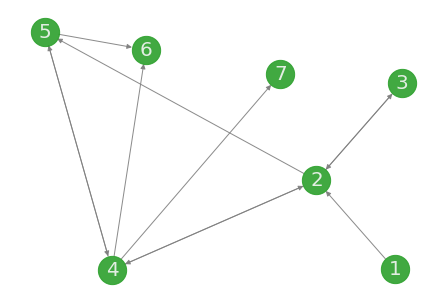

In [15]:
G = nx.DiGraph()

options = {"edge_color": "tab:gray",  "node_size": 800, "alpha": 0.9, 
           "node_color": "tab:green", "font_size": 20, "font_color":"whitesmoke"}

# add nodes and edges
G.add_nodes_from(range(1,7+1))
G.add_edges_from([(1,2),(2,3),(3,2),(2,4),(2,5),(5,4),(4,5),(4,6),(4,2),(4,7),(5,6)])

# establish the position with a fixed seed
pos = nx.spring_layout(G, k=1, iterations=3, threshold=0.0001, seed=35129314) 
nx.draw(G, pos, with_labels=True, **options)

In [16]:
def pagerank_prom(G, alpha=0.85):         # Closeness
    N = len(G); s = 0
    p = nx.pagerank(G, alpha=alpha, nstart={1:0.000005, 2:0.000001,3:0.000003,4:0.000002,5:0.000001,6:0.000002,7:0.000001},
                    dangling=None, max_iter=1000)
    for key in p:
        s += p[key]
    return s/N

In [17]:
print("------ PageRank (delta=0.85) ------","\n")
print("Promedio:", pagerank_prom(G, alpha=0.85),"\n")
print("------ PageRank ------")
for delta in np.array([0.0,0.5,0.7,0.9,1]):
    print("Promedio:", pagerank_prom(G, alpha=delta), "( delta=", delta,")")

------ PageRank (delta=0.85) ------ 

Promedio: 0.14285714285714282 

------ PageRank ------
Promedio: 0.14285714285714282 ( delta= 0.0 )
Promedio: 0.14285714285714285 ( delta= 0.5 )
Promedio: 0.14285714285714288 ( delta= 0.7 )
Promedio: 0.14285714285714285 ( delta= 0.9 )
Promedio: 0.14285714285714274 ( delta= 1.0 )


### Histogramas

In [18]:
def hist_centrality(G, alpha_k=0.1, beta_k=1.0, delta_pr=0.85, max_iter=500, tol=1e-04):
    N = len(G); 
    s1, s2, s3 = [], [], [] 
    B1 = nx.eigenvector_centrality(G, max_iter=max_iter, tol=tol)
    B2 = nx.katz_centrality_numpy(G, alpha=alpha_k, beta=beta_k, normalized=False)
    B3 = nx.pagerank(G, alpha=delta_pr, nstart={1:0.000005, 2:0.000001,3:0.000003,4:0.000002,5:0.000001,6:0.000002,7:0.000001},
                    dangling=None, max_iter=1000)
    for key in B1:
        s1.append(B1[key])
    s1 = np.array(s1)
    
    for key in B2:
        s2.append(B2[key])
    s2 = np.array(s2)
    
    for key in B3:
        s3.append(B3[key])
    s3 = np.array(s3)
    
    fig, axes = plt.subplots(1,3, figsize=(13, 5), squeeze=True)
#   ---------------------------------------------------------
    sns.histplot(data=s1, ax=axes[0], y=None, hue=None, stat='count', shrink=1,
                     binwidth=None, binrange=None, discrete=None,
                     cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', color="orange")
    axes[0].title.set_text("Eigenvector centrality")
#   ---------------------------------------------------------
    sns.histplot(data=s2, ax=axes[1], y=None, hue=None, stat='count', shrink=1,
                     binwidth=None, binrange=None, discrete=None,
                     cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', color="orange")
    axes[1].title.set_text("Katz centrality")
#   ---------------------------------------------------------
    sns.histplot(data=s3, ax=axes[2], y=None, hue=None, stat='count', shrink=1,
                     binwidth=None, binrange=None, discrete=None,
                     cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', color="orange")
    axes[2].title.set_text("PageRank centrality")
    
    fig.tight_layout()
    plt.show()

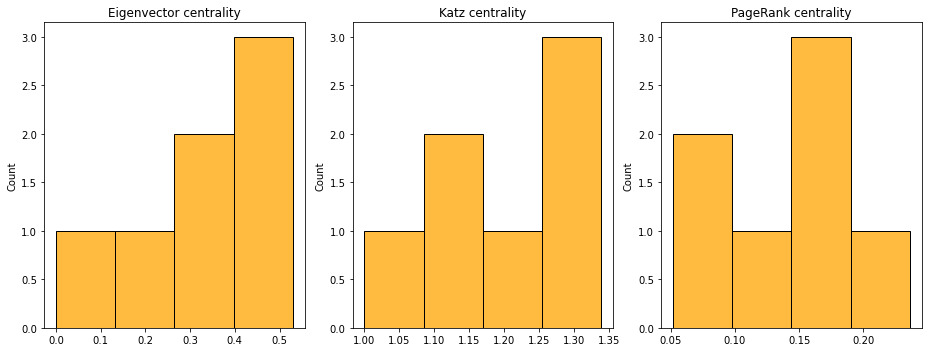

In [19]:
hist_centrality(G, alpha_k=0.1, beta_k=1.0, delta_pr=0.85)

### Datasets: `bio-diseasomeEL.txt`

In [20]:
df1 = pd.read_csv("Datasets/bio-diseasomeEL.txt", sep="\s", header=None, names=["In", "Out"])
# df1.head()

edge_list1 = []                       # extrayendo lista de aristas
for i in range(len(df1)):
    edge_list1.append((df1.to_numpy()[i][0], df1.to_numpy()[i][1]))

C:\Users\Joshu\AppData\Local\Temp\ipykernel_9308\220664543.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv("Datasets/bio-diseasomeEL.txt", sep="\s", header=None, names=["In", "Out"])


In [170]:
def is_weighted(edge_list):
    return len(edge_list[0]) > 2
# ----------------------------------------------------
def is_directed(edge_list):
    node_list = np.unique(np.array(edge_list)[:,0:2])
    temp_list = [(i[0],i[1]) for i in edge_list]
    s = is_weighted(edge_list)
    l_1 = len(edge_list)
    l_2 = len(list(nx.edge_dfs(nx.Graph(temp_list), node_list)))
    if l_1 == l_2:
        return False
    else: 
        return True
# ----------------------------------------------------
def make_graph(edge_list):
    if is_directed(edge_list) == False:
        G = nx.Graph()
    else:
        G = nx.DiGraph()
    if is_weighted(edge_list) == False:
        G.add_edges_from(edge_list)
    else:
        G.add_weighted_edges_from(edge_list, weight='weight')
    return G
# ----------------------------------------------------
def is_connected(G):
    cc = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
    if len(cc)==1:
        s = True
    else: 
        s = False
    return s, cc[0]
# ----------------------------------------------------
def analyse_edges(edge_list):
    dict_E = dict()
    dict_E["Weighted"] = is_weighted(edge_list)
    dict_E["Directed"] = is_directed(edge_list)
    if dict_E["Directed"] == True:
        G_temp = make_graph(edge_list).to_undirected()
    else:
        G_temp = make_graph(edge_list)
    dict_E["Connected"] = is_connected(G_temp)[0]
    dict_E["Max. connected components"] = is_connected(G_temp)[1]
    
    return dict_E
# ----------------------------------------------------
def grado_in_prom(G):
    N = len(G); s = 0
    B = dict(G.in_degree())
    for key in B:
        s += B[key]
    return s/N
# ----------------------------------------------------    
def grado_out_prom(G):
    N = len(G); s = 0
    B = dict(G.out_degree())
    for key in B:
        s += B[key]
    return s/N
# ----------------------------------------------------
def analyse_graph(G, dict_E, k=len(G)):
    dict_G = dict()
    
    if dict_E["Directed"] == True:
        while True:
            try:
                L = nx.directed_laplacian_matrix(G, weight="weight")
                L_graph = plt.matshow(L, cmap='Greys')
                plt.title("Laplacian matrix")
            except MemoryError as err:
                print(err)
                break
        dict_G["In-degree"]  = grado_in_prom(G)
        dict_G["Out-degree"] = grado_out_prom(G)
    else:
        L = nx.laplacian_matrix(G, weight='weight')
        L_graph = plt.spy(L, markersize=1, c="black")
        dict_G["Degree"]     = grado_prom(G)
        plt.title("Laplacian matrix")

    dict_G["Clustering"]     = clustering_prom(G)
    dict_G["Betweenness"]    = betweenness_prom(G, k = k)
    dict_G["Shortest-path"]  = shortest_path_length_prom(G)
    
    if dict_E["Connected"] == True:
        if dict_E["Directed"] == False:
            dict_G["Diameter"]     = nx.diameter(G)
            dict_G["Eccentricity"] = eccentricity_prom(G)
        else:
            pass
    else:
        dict_G["Diameter"]     = float('inf')
        dict_G["Eccentricity"] = float('inf')
        
    dict_G["Closeness"]      = closeness_prom(G)
    dict_G["Eigen"]      = eigenvalue_prom(G, max_iter=500, tol=1e-03)
    dict_G["Katz"]       = katz_prom(G, alpha=0.1, beta=1.0)
    dict_G["PageRank"]   = pagerank_prom(G, alpha=0.85)
    
    return dict_G

In [96]:
def analyse_coefficients(G, bins=10):
    N = len(G); 
    s1, s2 = [], []
    
    p1 = nx.clustering(G)
    p2 = dict(nx.shortest_path_length(G))
    
    for key in p1:
        s1.append(p1[key])

    for i in p2:
        for j in p2[i]:
            s2.append(p2[i][j])
    
    s1 = np.array(s1)
    s2 = np.array(s2)        
#   ---------------------------------------------------------
    if (type(G) == "networkx.classes.digraph.DiGraph") or (type(G) == "networkx.classes.digraph.MultiDiGraph"): 
        k_in, k_out = [], []
        B1 = dict(G.in_degree())
        B2 = dict(G.out_degree())
        for key in B1:
            k_in.append(B1[key])
            k_out.append(B2[key])
        k_in = np.array(k_in)
        k_out = np.array(k_out)
        C = [s1, s2, k_in, k_out]
    else:
        k = []
        B = dict(G.degree())
        for key in B:
            k.append(B[key])
        k = np.array(k)  
        C = [s1, s2, k]
#   ---------------------------------------------------------
    hists, X_hists, bines = np.empty([len(C), bins]), np.empty([len(C), bins]), np.empty([len(C), bins+1])
    for i in range(len(C)):
        hists[i], bines[i] = np.histogram(C[i], bins = bins)
        X_hists[i] = [0.5 * (bines[i][j] + bines[i][j+1]) for j in range(bins)]
        
    fig, axes = plt.subplots(2,len(C), figsize=(13, 8), squeeze=True)
#   ---------------------------------------------------------
    if len(C) == 3:
        titles = ["Clustering coefficient (semi-log)", "Shortest-path length (semi-log)", "Node degree (semi-log)",
                  "Clustering coefficient (log-log)", "Shortest-path length (log-log)", "Node degree (log-log)"]
    else:
        titles = ["Clustering coefficient (semi-log)", "Shortest-path length (semi-log)",
                  "Degree [in] (semi-log)", "Degree [out] (semi-log)", 
                  "Clustering coefficient (log-log)", "Shortest-path length (log-log)",
                  "Degree [in] (log-log)", "Degree [out] (log-log)"]
#   ---------------------------------------------------------
    for i in range(2*len(C)):
        axes[i//len(C),i%len(C)].scatter(X_hists[i%len(C)], hists[i%len(C)], s=9, c="red", marker="o")
        axes[i//len(C),i%len(C)].set_xscale('log')
        if i > len(C) - 1:
            axes[i//len(C),i%len(C)].set_yscale('log')
        axes[i//len(C),i%len(C)].grid()
        axes[i//len(C),i%len(C)].title.set_text(titles[i])
#   ---------------------------------------------------------

    fig.tight_layout()
    plt.show()

In [23]:
dict_E1 = analyse_edges(edge_list1)
dict_E1

{'Weighted': False,
 'Directed': False,
 'Connected': True,
 'Max. connected components': 516}

{'Degree': 4.604651162790698,
 'Clustering': 0.6358304997771197,
 'Betweenness': 1418.565891472869,
 'Shortest-path': 6.5089937532926925,
 'Diameter': 15,
 'Eccentricity': 11.571705426356589,
 'Closeness': 0.15937101043257765,
 'Eigen': 0.016348332682810968,
 'Katz': 1.5556460929930886,
 'PageRank': 0.0019379844961240297}

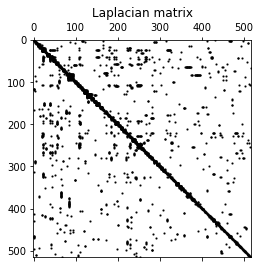

In [75]:
G1 = make_graph(edge_list1)
analyse_graph(G1, dict_E1)

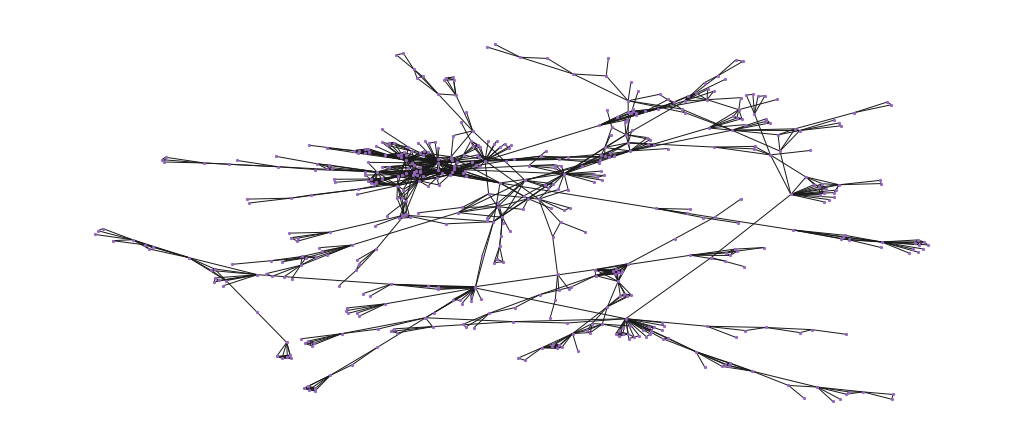

In [25]:
plt.figure(figsize=(14,6))
options2 = {"edge_color": "0.1",  "node_size": 5, "alpha": 1, 
           "node_color": "tab:purple", "font_size": 4, "font_color":"whitesmoke"}

nx.draw(G1, **options2)

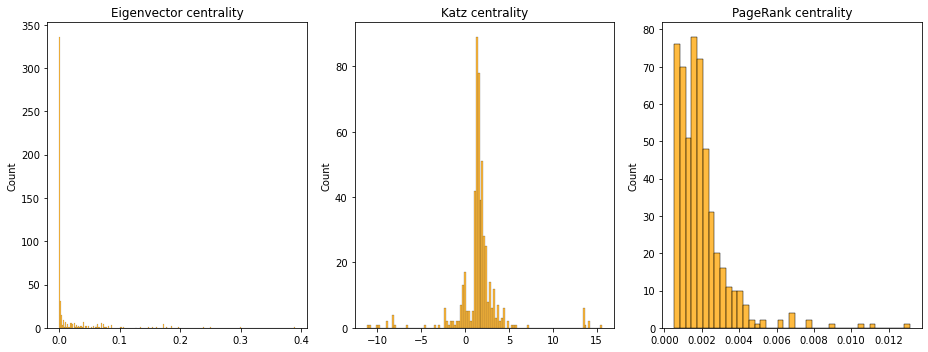

In [26]:
hist_centrality(G1, alpha_k=0.1, beta_k=1.0, delta_pr=0.85)

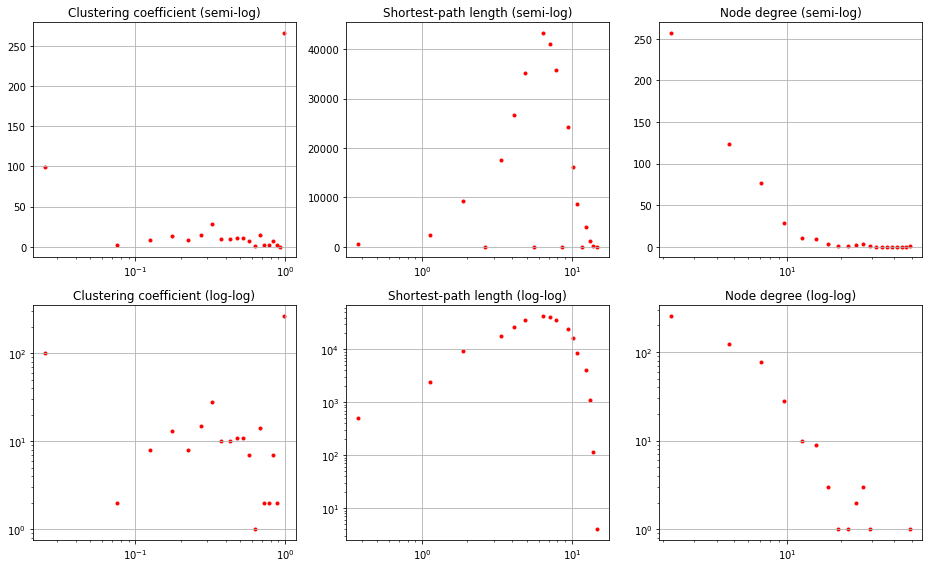

In [27]:
analyse_coefficients(G1, bins=20)

### Datasets: `bio-yeast-protein-inter.edges`

In [28]:
df2 = pd.read_csv("Datasets/bio-yeast-protein-inter.edges", sep="\s", header=None, names=["In", "Out"])
# df2.head()

edge_list2 = []                       # extrayendo lista de aristas
for i in range(len(df2)):
    edge_list2.append((df2.to_numpy()[i][0], df2.to_numpy()[i][1]))

C:\Users\Joshu\AppData\Local\Temp\ipykernel_9308\3267845804.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv("Datasets/bio-yeast-protein-inter.edges", sep="\s", header=None, names=["In", "Out"])


In [29]:
dict_E2 = analyse_edges(edge_list2)
dict_E2

{'Weighted': False,
 'Directed': True,
 'Connected': False,
 'Max. connected components': 1458}

{'In-degree': 2.3957219251336896,
 'Out-degree': 2.3957219251336896,
 'Clustering': 0.06716802014455514,
 'Betweenness': 6603.036363636365,
 'Shortest-path': 4.1409698915316895,
 'Diameter': inf,
 'Eccentricity': inf,
 'Closeness': 0.09193164626441669,
 'Eigen': 0.009709297926367003,
 'Katz': 1.651304705836491,
 'PageRank': 0.0005347593582887648}

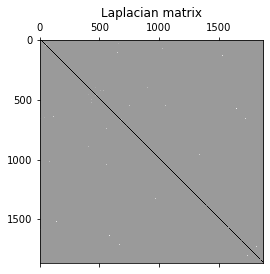

In [76]:
G2 = make_graph(edge_list2)
analyse_graph(G2, dict_E2)

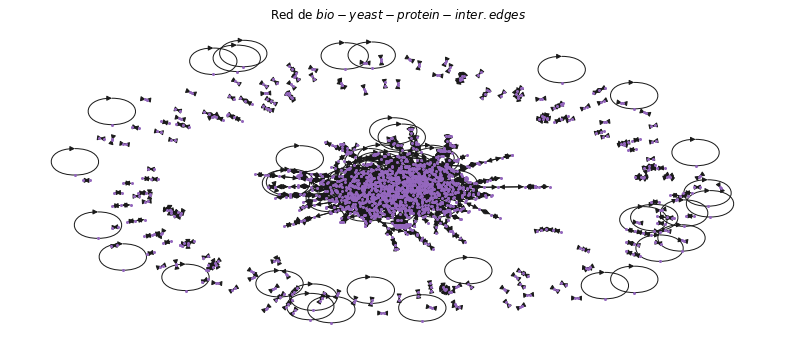

In [32]:
options3 = {"edge_color": "0.1",  "node_size": 4, "alpha": 1, 
           "node_color": "tab:purple", "font_size": 0, "font_color":"whitesmoke"}

plt.figure(figsize=(14,6))
plt.title(r"Red de $bio-yeast-protein-inter.edges$")
nx.draw(G2, **options3)

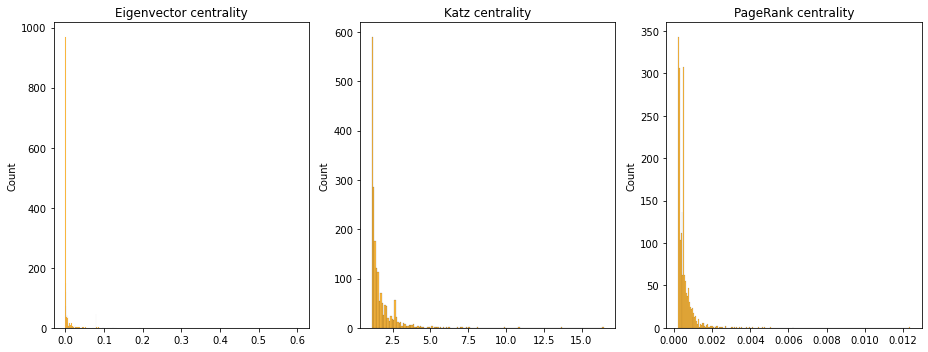

In [33]:
hist_centrality(G2, alpha_k=0.1, beta_k=1.0, delta_pr=0.85, max_iter=500, tol=1e-04)

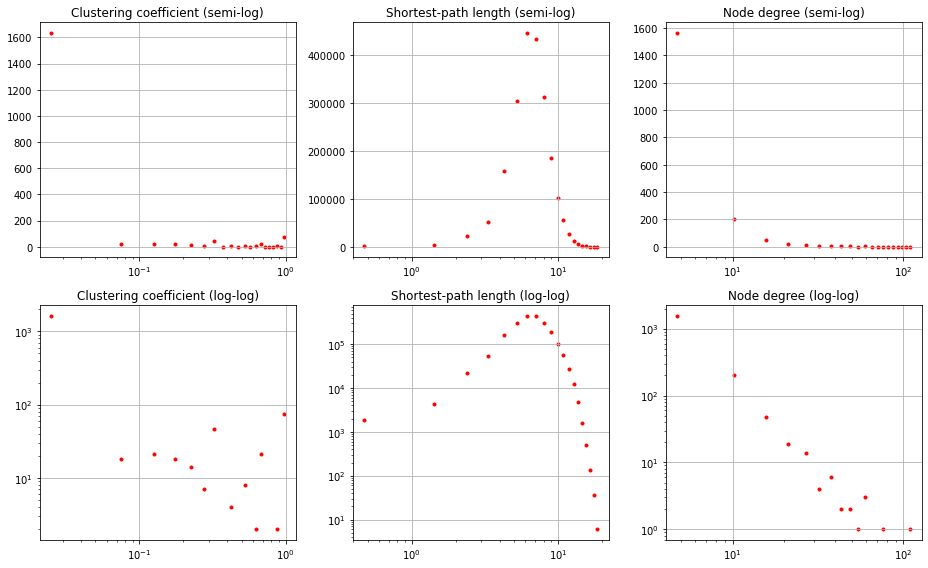

In [34]:
analyse_coefficients(G2, bins=20)

### Datasets: `retweet-digraph.edges`

In [35]:
df3 = pd.read_csv("Datasets/retweet-digraph.edges", sep="\s", header=None, names=["Retweet", "Mention", "Weight"])
df3['Retweet'] = [int(x[1:]) if isinstance(x, str) else np.nan for x in df3['Retweet']]
df3['Mention'] = [int(x[1:]) if isinstance(x, str) else np.nan for x in df3['Mention']]

df3.head()

C:\Users\Joshu\AppData\Local\Temp\ipykernel_9308\778563151.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df3 = pd.read_csv("Datasets/retweet-digraph.edges", sep="\s", header=None, names=["Retweet", "Mention", "Weight"])


,Retweet,Mention,Weight
0,1,15743,1
1,1,5410,1
2,15743,7114,6
3,15743,7578,1
4,15743,6213,1


In [81]:
edge_list3 = []                       # extrayendo lista de aristas y pesos
for i in range(len(df3)):
    edge_list3.append((df3.to_numpy()[i][0], df3.to_numpy()[i][1], df3.to_numpy()[i][2]))

In [84]:
dict_E3 = analyse_edges(edge_list3)
dict_E3

{'Weighted': True,
 'Directed': True,
 'Connected': True,
 'Max. connected components': 18470}

In [173]:
G3 = make_graph(edge_list3)
analyse_graph(G3, dict_E3, k = 900)

Unable to allocate 2.54 GiB for an array with shape (18470, 18470) and data type float64


KeyboardInterrupt: 

In [172]:
hist_centrality(G3, alpha_k=0.1, beta_k=1.0, delta_pr=0.85, max_iter=500, tol=1e-04)
analyse_coefficients(G3, bins=20)

C:\ProgramData\Anaconda3\envs\main_env\lib\site-packages\networkx\algorithms\centrality\katz.py:325: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=nodelist, weight=weight).todense().T


MemoryError: Unable to allocate 1.27 GiB for an array with shape (18470, 18470) and data type int32

### Datasets: `soc-dolphins.mtx`

In [136]:
df4 = pd.read_csv("Datasets/dolphins/soc-dolphins.mtx",  sep="\s", comment='%', 
                  names=["In", "Out"], index_col=False)
df4.head()

edge_list4 = []                       # extrayendo lista de aristas
for i in range(len(df4)-1):
    edge_list4.append((df4.to_numpy()[i+1][0], df4.to_numpy()[i+1][1]))

C:\Users\Joshu\AppData\Local\Temp\ipykernel_9308\3422948535.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df4 = pd.read_csv("Datasets/dolphins/soc-dolphins.mtx",  sep="\s", comment='%',


In [137]:
dict_E4 = analyse_edges(edge_list4)
dict_E4

{'Weighted': False,
 'Directed': False,
 'Connected': True,
 'Max. connected components': 62}

In [145]:
eccentricity_prom(G4)

6.5

C:\ProgramData\Anaconda3\envs\main_env\lib\site-packages\networkx\algorithms\centrality\katz.py:325: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=nodelist, weight=weight).todense().T


{'Degree': 5.096774193548387,
 'Clustering': 0.25519480519480514,
 'Betweenness': 72.00000000000001,
 'Shortest-path': 3.360655737704918,
 'Diameter': 8,
 'Eccentricity': 6.5,
 'Closeness': 0.30684164815718024,
 'Eigen': 0.09386139967993534,
 'Katz': 2.6298145472712924,
 'PageRank': 0.01612903225806451}

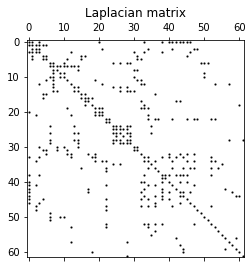

In [155]:
G4 = make_graph(edge_list4)
analyse_graph(G4, dict_E4)

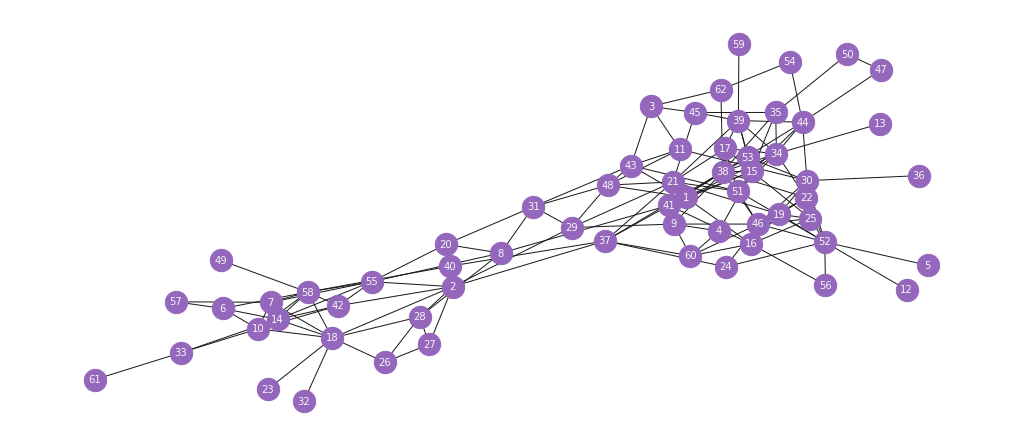

In [160]:
plt.figure(figsize=(14,6))
options2 = {"edge_color": "0.1",  "node_size": 500, "alpha": 1, 
           "node_color": "tab:purple", "font_size": 10, "font_color":"whitesmoke"}

pos = nx.spring_layout(G4, k=1, iterations=1000, threshold=0.0001, seed=555129314) 
nx.draw(G4, pos, with_labels=True, **options2)
# nx.draw(G4, **options2)

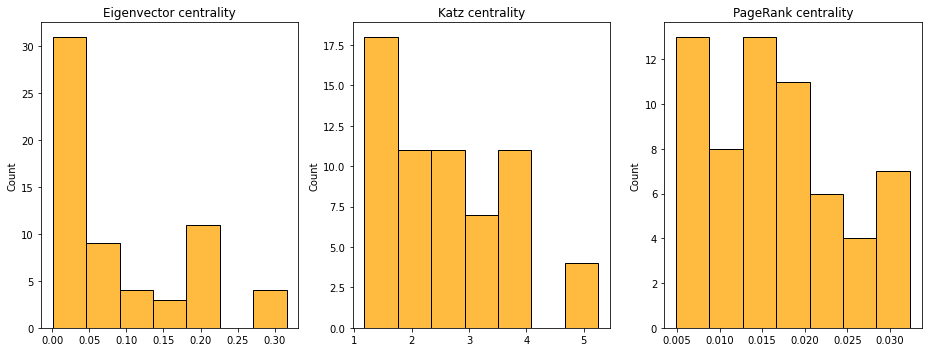

In [161]:
hist_centrality(G4, alpha_k=0.1, beta_k=1.0, delta_pr=0.85, max_iter=500, tol=1e-04)

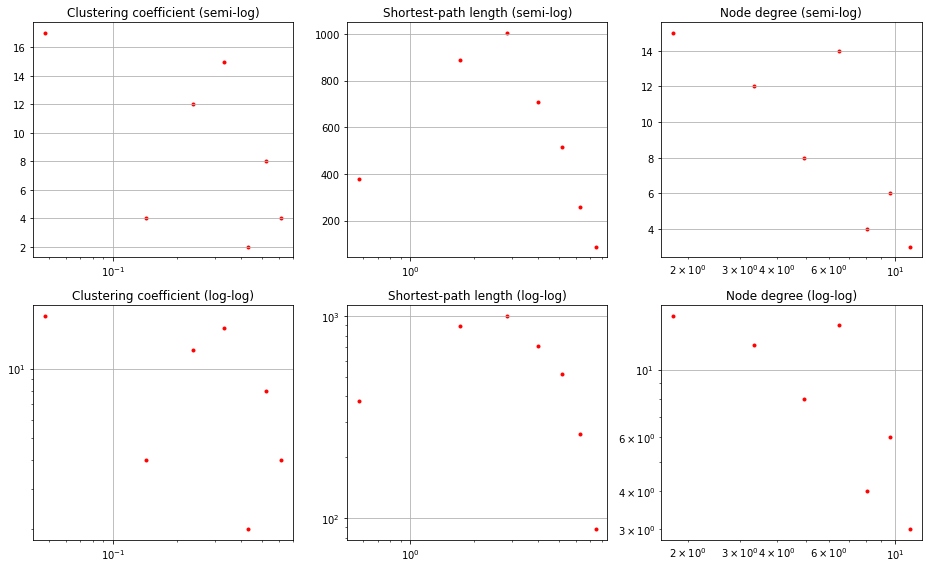

In [165]:
analyse_coefficients(G4, bins=7)

##  Apéndice

In [ ]:
G = nx.Graph()

options = {"edge_color": "tab:gray",  "node_size": 800, "alpha": 0.9, 
           "node_color": "tab:green", "font_size": 20, "font_color":"whitesmoke"}

# add nodes and edges
G.add_nodes_from(range(1,5+1))
G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(2,5),(3,4),(3,5)])

# establish the position with a fixed seed
pos = nx.spring_layout(G, k=1, iterations=3000, threshold=0.00001, seed=6229312) 
nx.draw(G, pos, with_labels=True, **options)

In [ ]:
G = nx.Graph()

options = {"edge_color": "tab:gray",  "node_size": 800, "alpha": 0.9, 
           "node_color": "tab:green", "font_size":20, "font_color":"whitesmoke"}

# add nodes and edges
G.add_nodes_from(range(1,5+1))
G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(2,5),(3,4),(3,5)])

# establish the position with a fixed seed
pos = nx.spring_layout(G, seed=31137942) 
nx.draw_spectral(G, with_labels=True, **options)

In [ ]:
G = nx.cubical_graph()
pos = nx.spring_layout(G, seed=3113794)

nx.draw_shell(G, nlist=[range(4), range(4,8)], with_labels=True)
